# Sanity test

In [1]:
import sys
sys.path.append("../../..")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from umap import UMAP
#from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error 

from librep.datasets.har.loaders import UCIHAR_UnbalancedView20Hz
from librep.datasets.multimodal import TransformMultiModalDataset, WindowedTransform
from librep.transforms.fft import FFT
from librep.transforms.filter import ButterWorthFilter
from librep.utils.workflow import SimpleTrainEvalWorkflow, MultiRunWorkflow
from librep.estimators import RandomForestClassifier, SVC, KNeighborsClassifier
from librep.metrics.report import ClassificationReport

2022-10-28 09:52:41.613404: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-28 09:52:41.613427: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
loader = UCIHAR_UnbalancedView20Hz("../../../data_2/views/UCI-HAR/balanced_20Hz_filtered", 
                                   download=False) 
data_filtered = loader.load(concat_all=True, label="standard activity code")
data_filtered.data['standard activity code'] = data_filtered.data['standard activity code'].astype('int')
data_filtered

PandasMultiModalDataset: samples=2840, features=360, no. window=6, label_columns='standard activity code'

In [4]:
loader = UCIHAR_UnbalancedView20Hz("../../../data_2/views/UCI-HAR/balanced_20Hz_without_gravity", 
                                   download=False) 
data_no_gravity = loader.load(concat_all=True, label="standard activity code")
data_no_gravity.data['standard activity code'] = data_no_gravity.data['standard activity code'].astype('int')
data_no_gravity

PandasMultiModalDataset: samples=2840, features=360, no. window=6, label_columns='standard activity code'

In [5]:
loader = UCIHAR_UnbalancedView20Hz("../../../data_2/views/UCI-HAR/balanced_20Hz_with_gravity", 
                                   download=False) 
data_gravity = loader.load(concat_all=True, label="standard activity code")
data_gravity.data['standard activity code'] = data_gravity.data['standard activity code'].astype('int')
data_gravity

filter_transform = ButterWorthFilter(btype='hp' ,fs=20)
windowed_filter_transform = WindowedTransform(
    filter_transform, fit_on="all", transform_on="window", select_windows=["accel-x", "accel-y", "accel-z"]
)
transformer_filter = TransformMultiModalDataset(transforms=windowed_filter_transform)

data_gravity_filtered = transformer_filter(data_gravity)
data_gravity_filtered

ArrayMultiModalDataset: samples=2840, shape=2840, no. window=6

## Plot de amostras

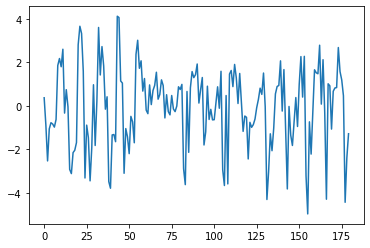

In [6]:
sample = np.array(data_no_gravity.data.iloc[:,:180])[0]
plt.plot(sample)

Amostra = 11 Atividade = walk


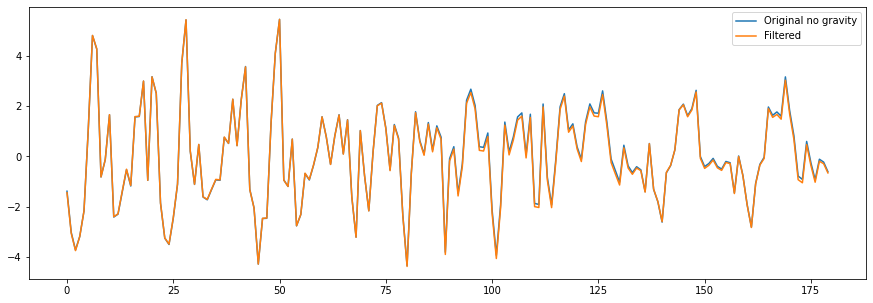

In [7]:
standard_activity_codes = {
    0: "sit",
    1: "stand",
    2: "walk",
    3: "stair up",
    4: "stair down",
    5: "run",
    6: "stair up and down"
}

amostra = 11
# sample = np.array(data_gravity.data.iloc[:,:180])[1]
# plt.plot(sample)
y = np.array(data_filtered.data['standard activity code'])[amostra]
label = standard_activity_codes[y]
print(f"Amostra = {amostra}", f"Atividade = {label}")
plt.figure(figsize=(15,5))
# sample = np.array(data_gravity.data.iloc[:,:180])[amostra]
# plt.plot(sample, label='Gravity')
sample = np.array(data_no_gravity.data.iloc[:,:180])[amostra]
plt.plot(sample, label='Original no gravity')
sample = np.array(data_filtered.data.iloc[:,:180])[amostra]
plt.plot(sample, label='Filtered')
plt.legend()

In [8]:
def plot_sample(standard_activity_codes, amostra, samples, label):
    
#     print(f"Amostra = {amostra}", f"Atividade = {label}")
    plt.figure(figsize=(15,5))    

#     plt.plot(samples[0], label='Gravity')
    plt.plot(samples[1], label='Original no gravity')
    plt.plot(samples[2], label='Filtered')
    plt.legend()
    plt.title("Amostra = {}  \n Atividade = {}".format(amostra, label))


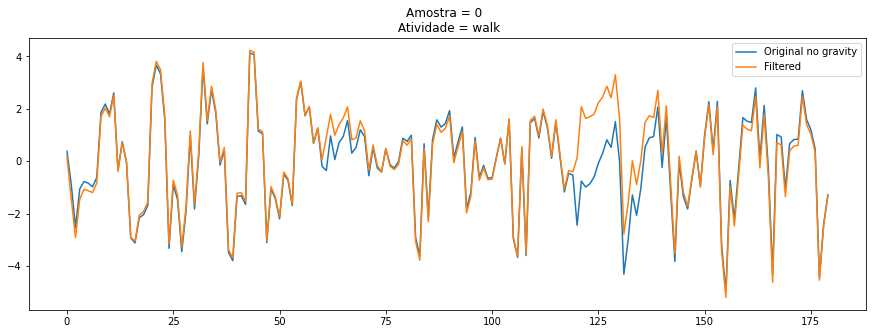

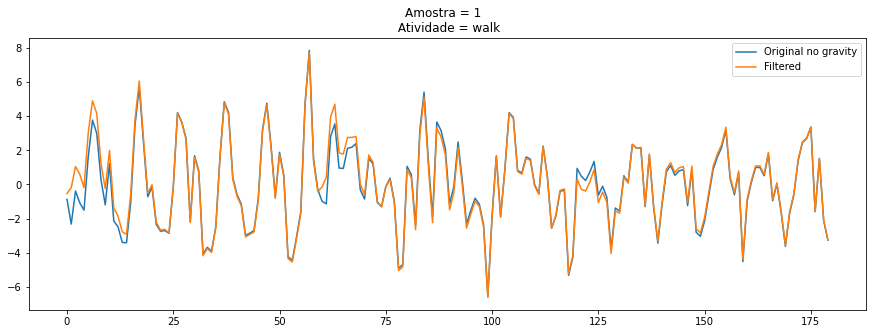

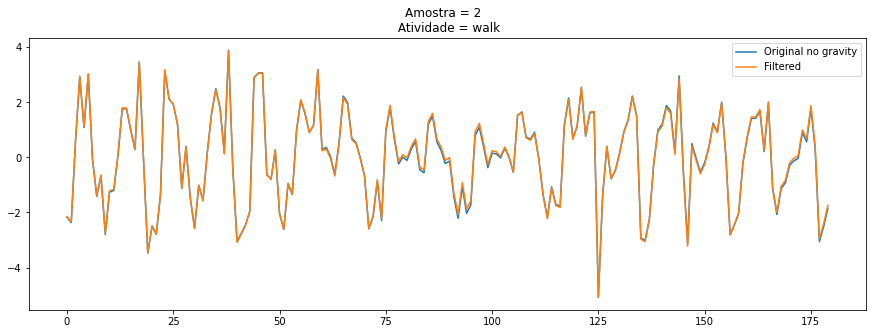

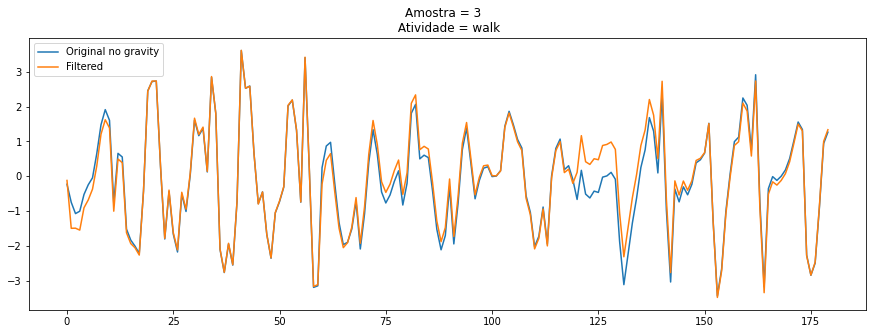

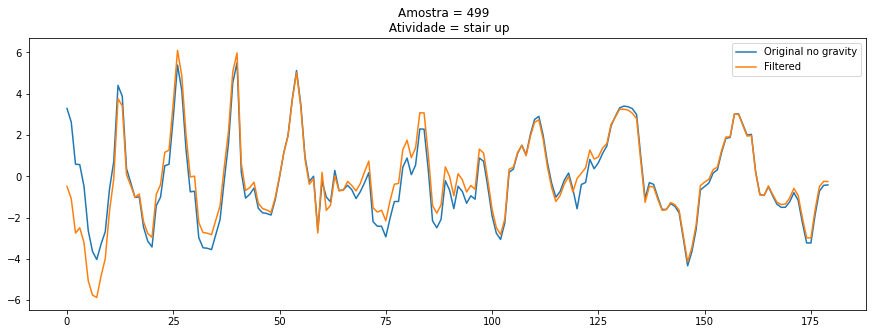

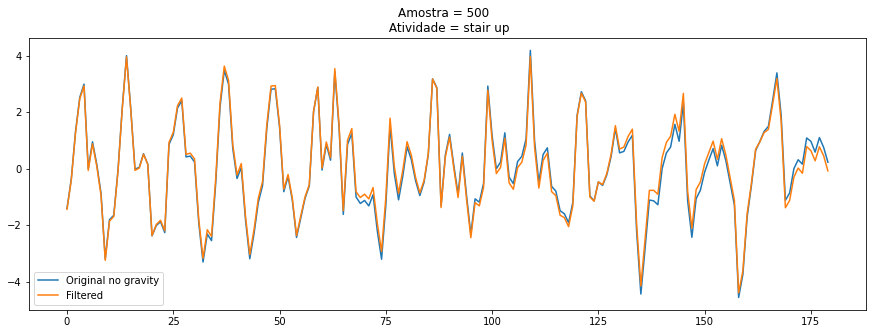

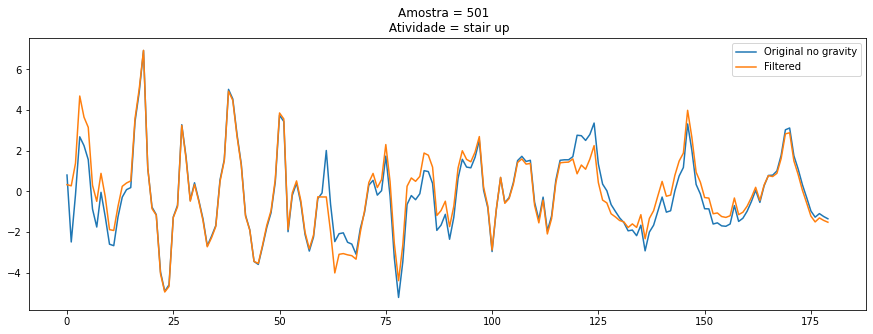

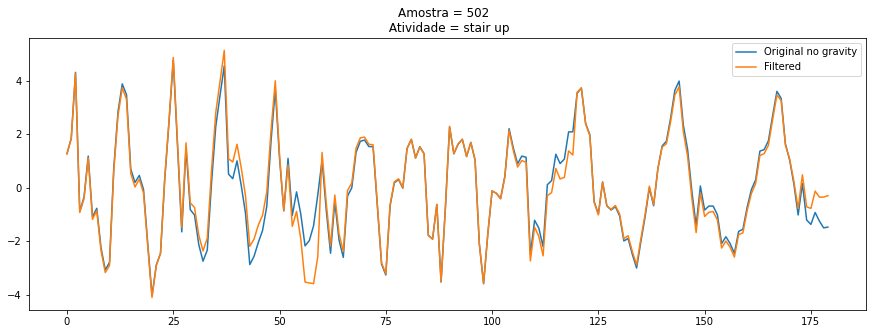

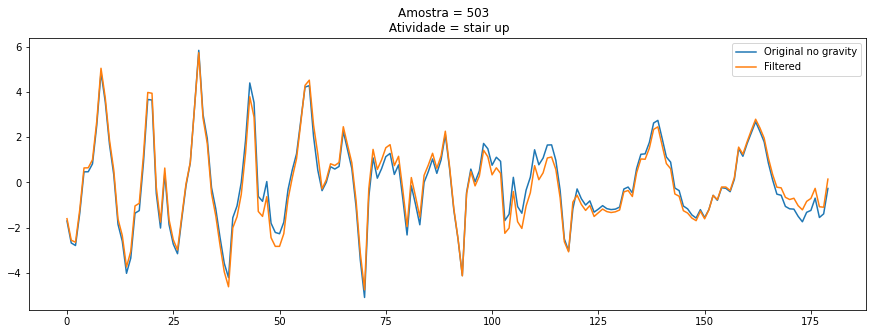

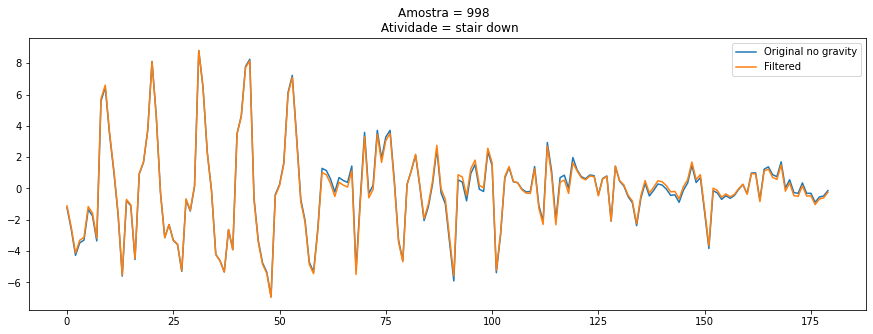

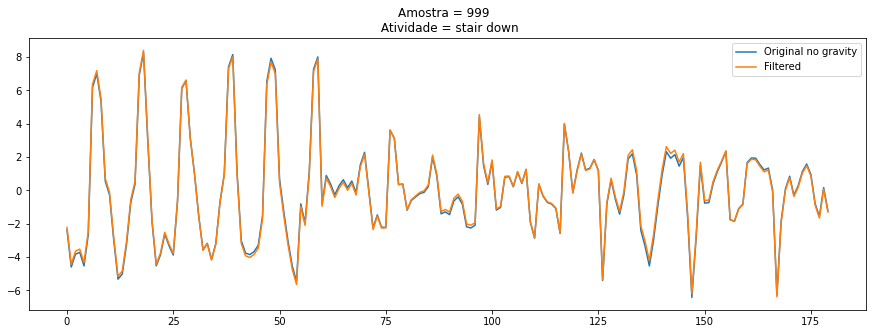

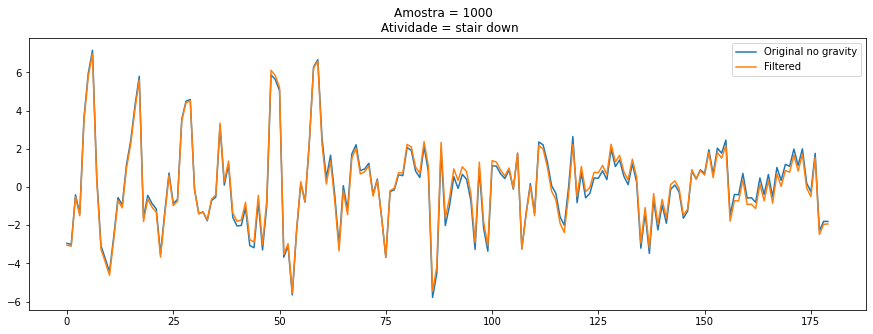

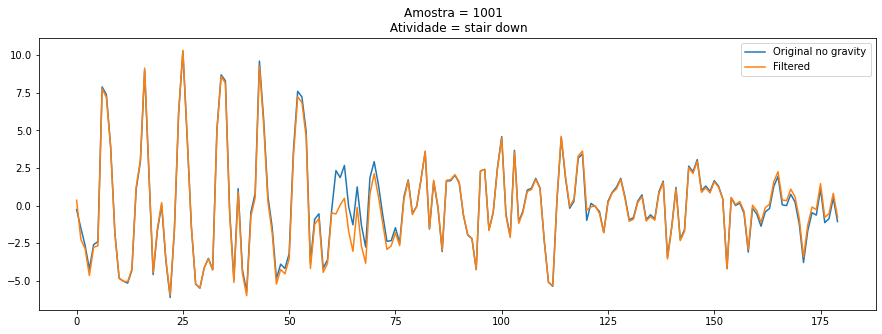

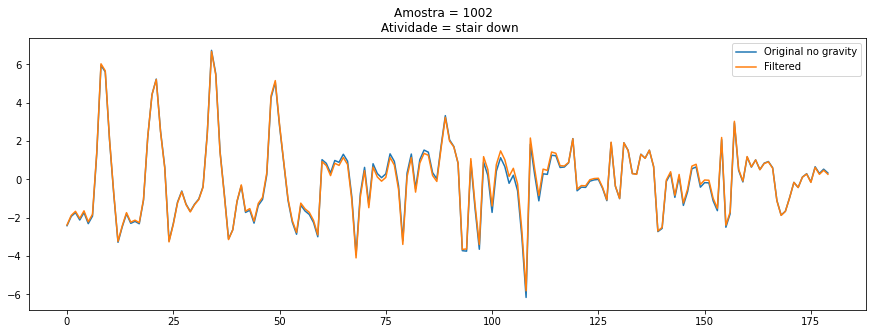

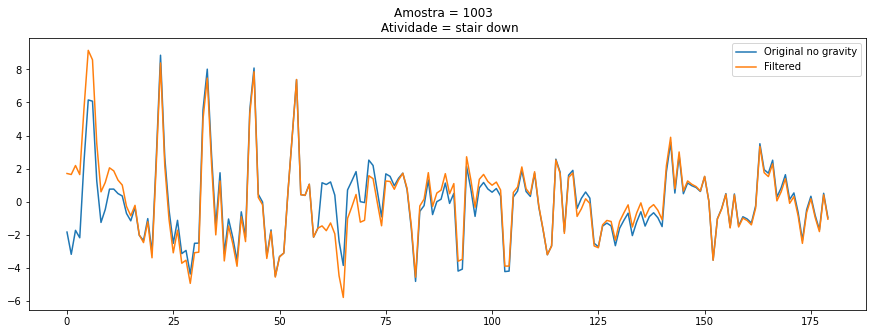

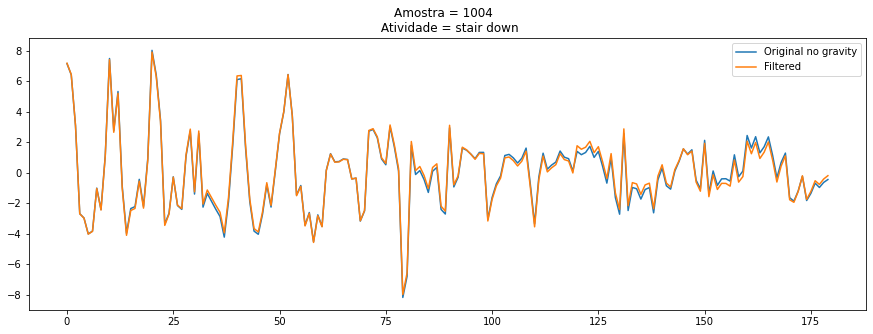

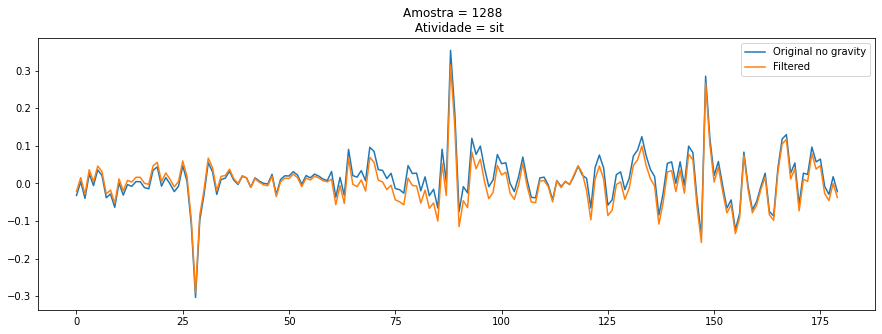

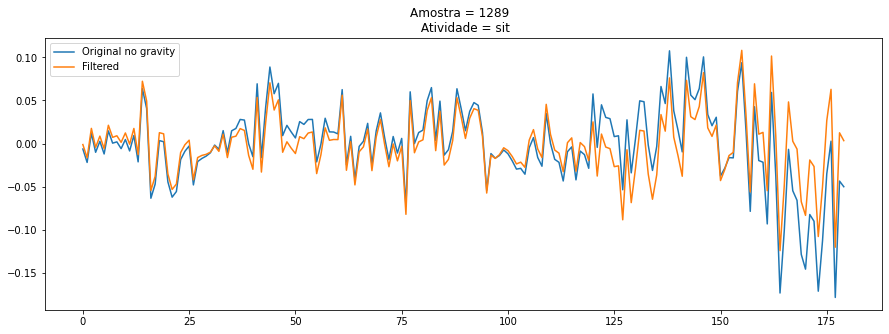

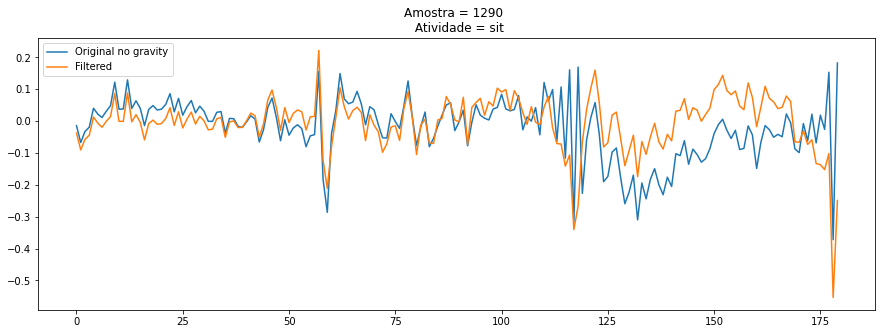

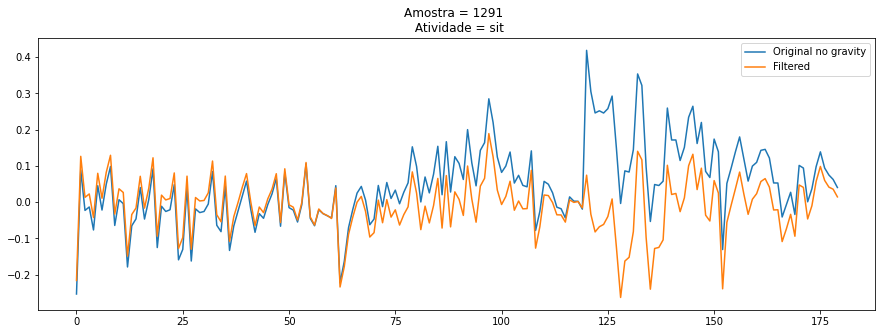

In [9]:
standard_activity_codes = {
    0: "sit",
    1: "stand",
    2: "walk",
    3: "stair up",
    4: "stair down",
    5: "run",
    6: "stair up and down"
}

amostras = [0, 1, 2, 3, 499, 500, 501, 502, 503, 998, 999, 1000, 1001, 1002, 1003, 1004, 1288, 1289, 1290, 
            1291]
for amostra in amostras:
    samples = []
    
    sample = np.array(data_gravity.data.iloc[:,:180])[amostra]
    samples.append(sample)    
    
    sample = np.array(data_no_gravity.data.iloc[:,:180])[amostra]
    samples.append(sample)
    
    sample = np.array(data_filtered.data.iloc[:,:180])[amostra]
    samples.append(sample)
    
    y = np.array(data_filtered.data['standard activity code'])[amostra]
    label = standard_activity_codes[y]
    
    plot_sample(standard_activity_codes, amostra, samples, label)
    

In [10]:
data_gravity.data

,accel-x-0,accel-x-1,accel-x-2,accel-x-3,accel-x-4,accel-x-5,accel-x-6,accel-x-7,accel-x-8,accel-x-9,...,gyro-z-53,gyro-z-54,gyro-z-55,gyro-z-56,gyro-z-57,gyro-z-58,gyro-z-59,activity code,user,standard activity code
0,10.252309,9.020630,7.383313,8.873947,9.168733,9.117348,8.979139,9.333941,11.813483,12.129856,...,0.313386,0.000744,-0.047502,-0.569485,-0.652966,0.050269,0.477185,1,23,2
1,8.503997,7.064544,9.025177,8.348934,7.930816,11.073866,13.221434,12.453484,9.741275,8.270829,...,0.841789,0.214277,-0.155207,-0.054555,0.275682,0.461437,-0.171866,1,8,2
2,7.743767,7.553412,10.494861,12.843225,11.002607,12.926478,9.834386,8.505613,9.248455,7.130993,...,-0.278544,-0.050879,0.363474,0.356592,0.452005,0.304909,-0.237935,1,16,2
3,9.586052,9.067150,8.754191,8.828208,9.316017,9.595997,9.796819,10.488646,11.317776,11.749132,...,0.290052,0.337902,0.202508,-0.316462,-0.537158,-0.476181,-0.320307,1,16,2
4,11.496181,11.786000,11.519307,12.113862,13.496395,11.770376,7.959978,6.486126,6.020901,7.045402,...,0.205870,-0.161104,-0.067245,-0.006595,-0.044617,-0.235705,0.503788,1,29,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,9.745765,9.727074,9.775520,9.748123,9.714220,9.713283,9.734333,9.782058,9.725047,9.731962,...,0.003225,0.007405,0.004294,0.003416,0.007763,0.007707,0.009001,5,3,1
2836,9.442332,9.361312,9.331909,9.540163,9.385332,9.412676,9.421924,9.387715,9.340852,9.230252,...,0.003043,-0.021028,-0.013950,-0.064271,-0.085593,-0.067198,-0.029561,5,21,1
2837,9.523900,9.552201,9.533026,9.506422,9.601724,9.579119,9.525655,9.553997,9.568259,9.561056,...,0.002107,-0.001484,-0.000134,0.003454,-0.001465,-0.004153,-0.002858,5,21,1
2838,10.056548,10.000835,10.022547,10.048386,10.029321,10.025912,10.026862,10.006391,10.033752,10.019007,...,-0.001573,-0.001164,0.006791,0.007795,0.006621,-0.025012,-0.060256,5,26,1


In [11]:
# Create the objects
fft_transform = FFT(centered=True)
# Compose the transform
# First apply the normalizer over whole dataset and then apply FFT over each window
transformer = TransformMultiModalDataset(
    transforms=[fft_transform], new_window_name_prefix="fft."
)

In [12]:
data_gravity_fft = transformer(data_gravity)
data_filtered_fft = transformer(data_filtered)
data_no_gravity_fft = transformer(data_no_gravity)

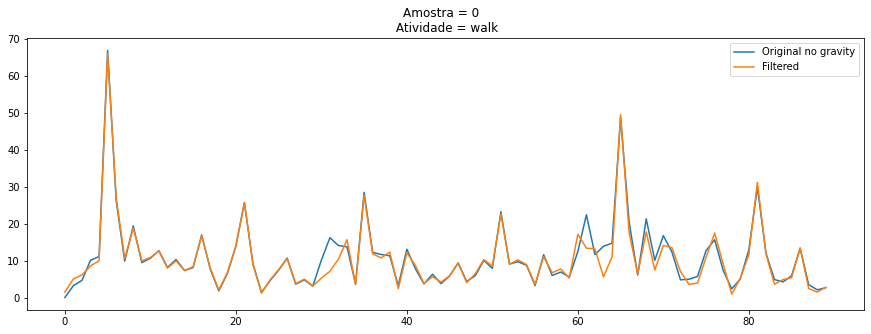

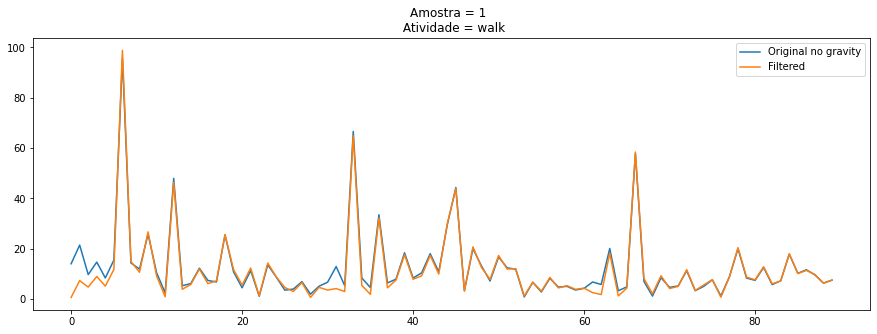

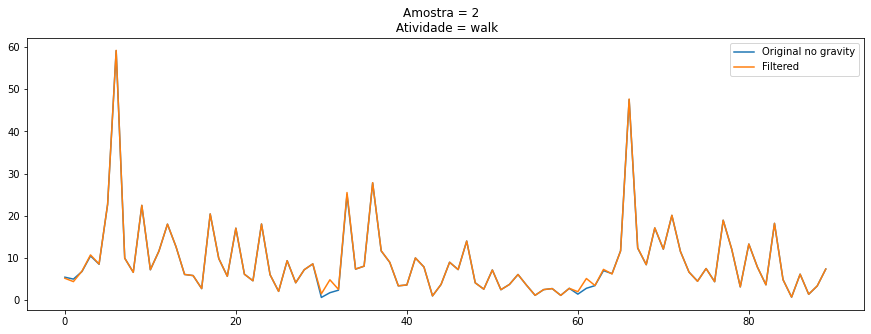

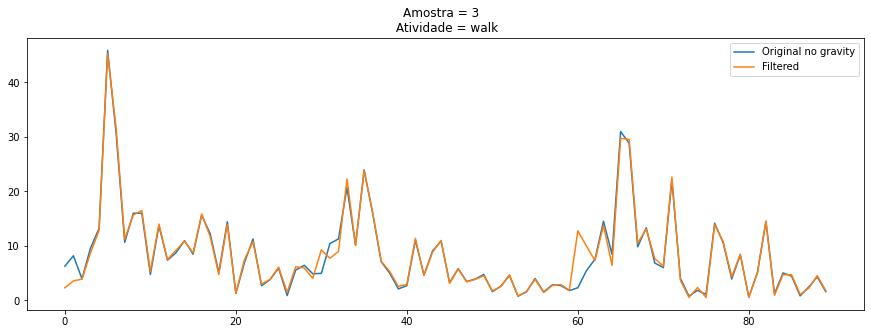

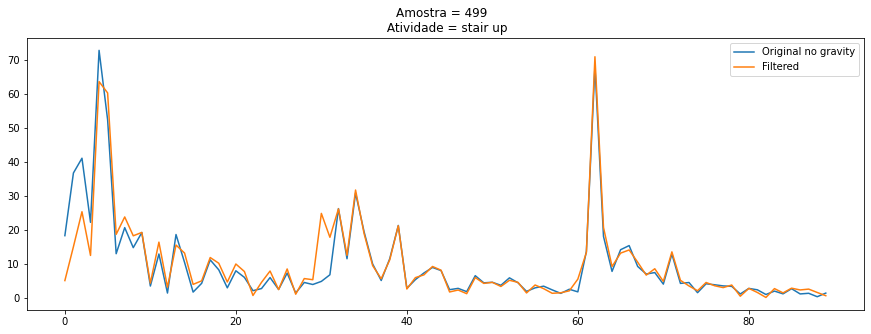

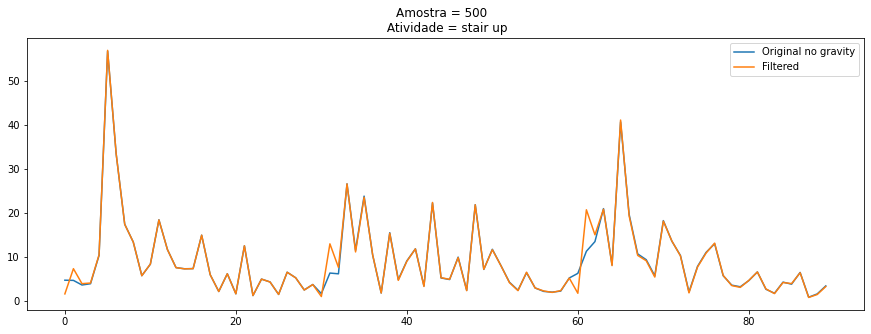

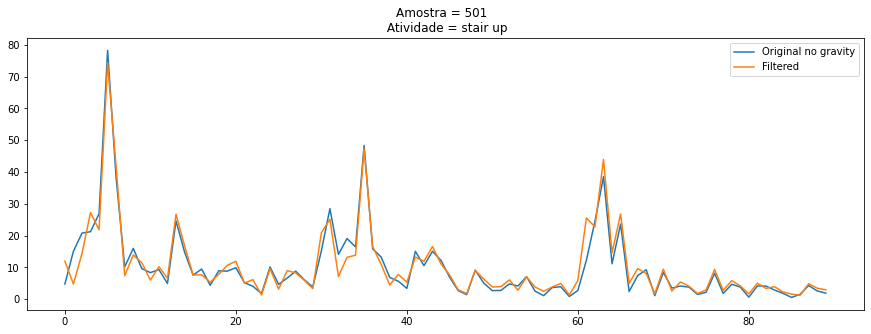

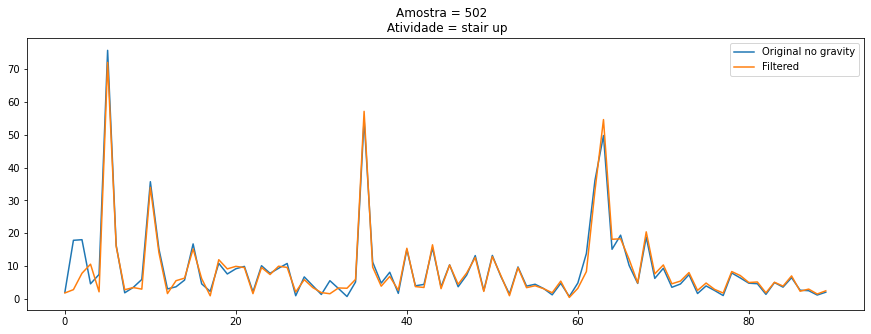

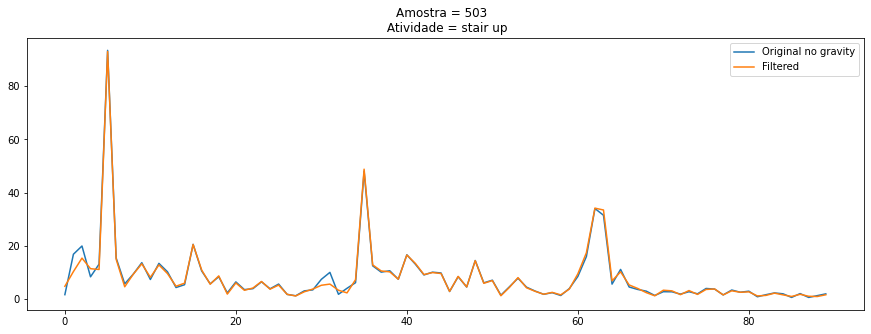

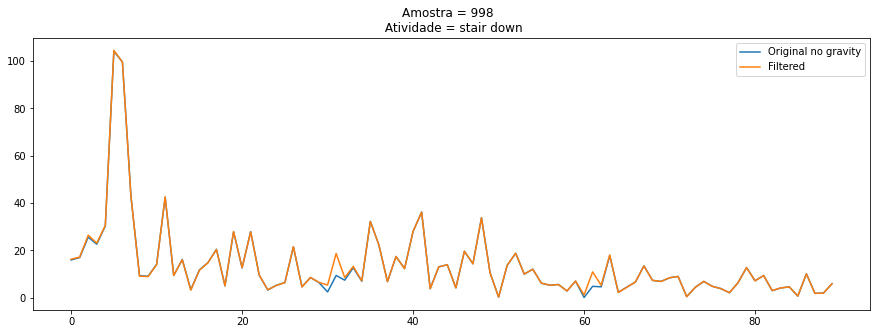

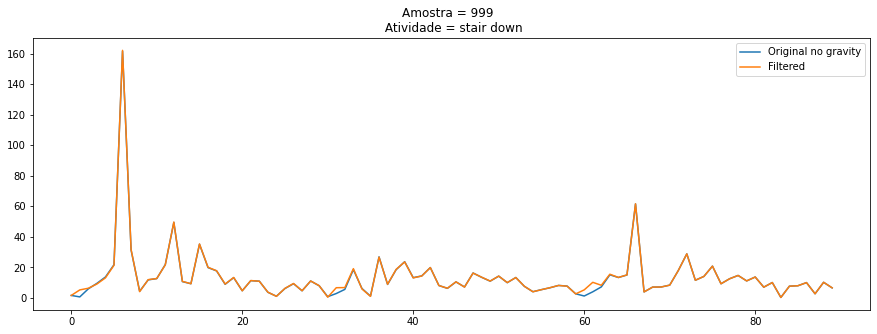

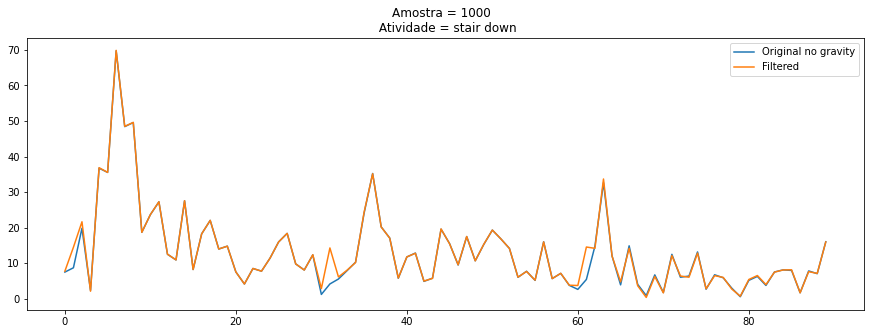

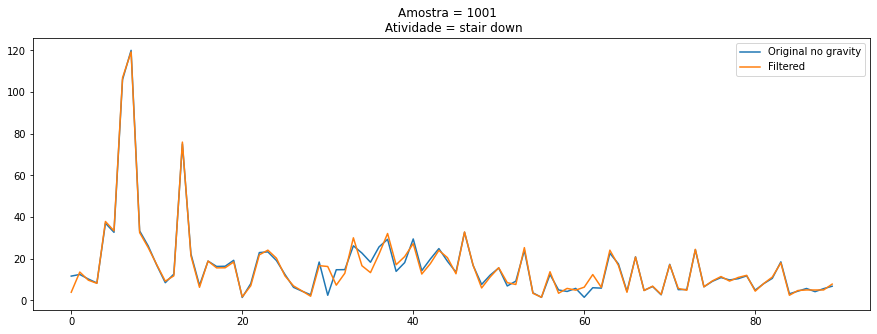

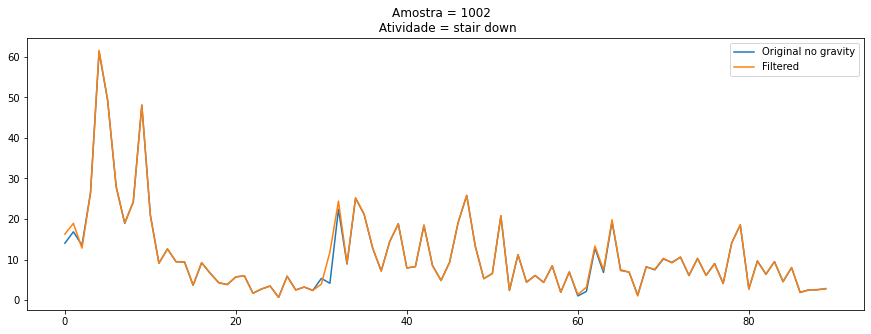

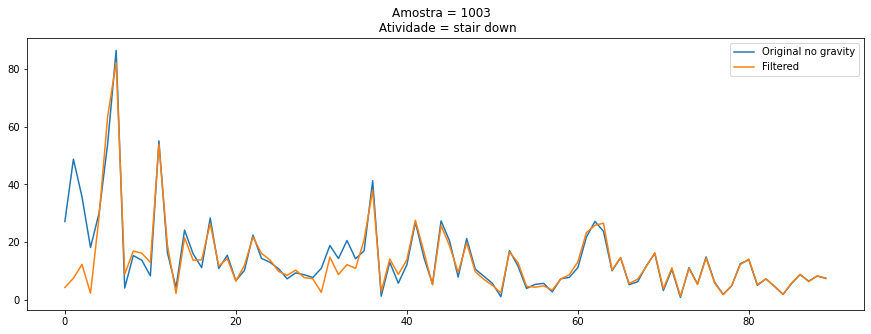

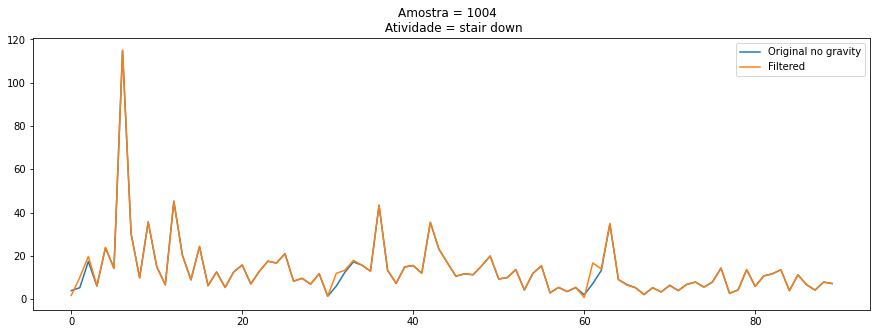

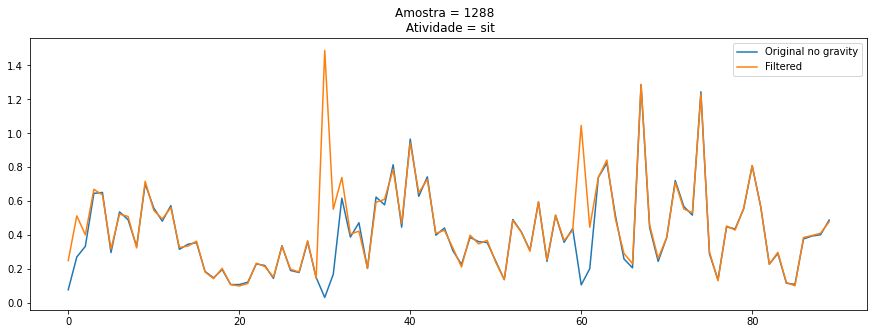

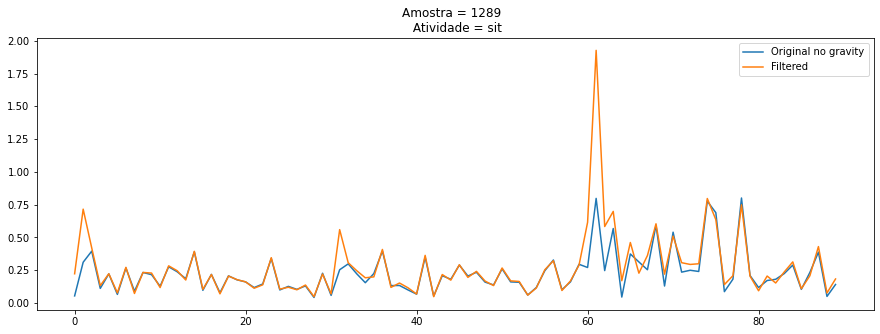

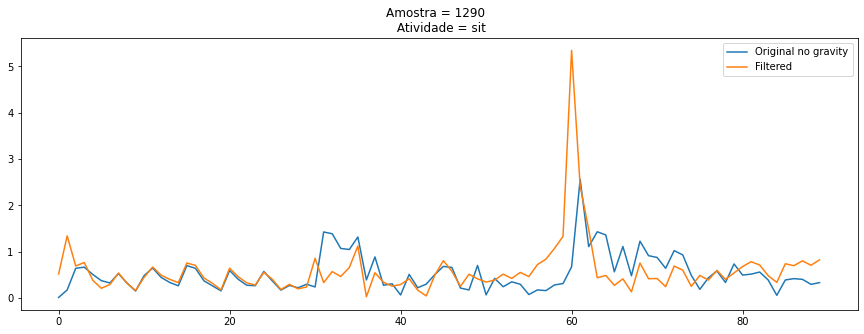

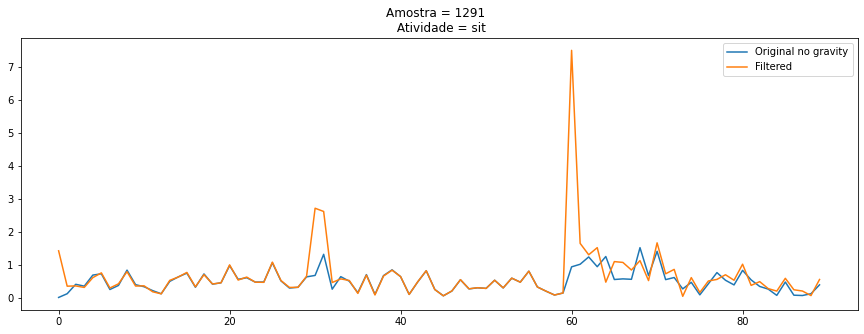

In [13]:
for amostra in amostras:
    samples = []
    
    sample = np.array(data_gravity_fft.X[amostra][:90])
    samples.append(sample)

    sample = np.array(data_filtered_fft.X[amostra][:90])
    samples.append(sample)    
    
    sample = np.array(data_no_gravity_fft.X[amostra][:90])
    samples.append(sample)
    
    
    y = np.array(data_filtered.data['standard activity code'])[amostra]
    label = standard_activity_codes[y]
    
    plot_sample(standard_activity_codes, amostra, samples, label)

In [14]:
data = pd.concat([data_filtered.data, data_no_gravity.data], axis=0)

tam = data.shape[0] // 2
dataset_name = np.array(['UCI_1' for i in range(tam)] + ['UCI_2' for i in range(tam)])
data['DataSet'] = dataset_name
tam = data.shape[0]

In [15]:
from librep.datasets.multimodal import PandasMultiModalDataset # Wrap CSVs to librep's `Dataset` interface

features = [
    "accel-x",
    "accel-y",
    "accel-z",
    "gyro-x",
    "gyro-y",
    "gyro-z"
]

# Creating the datasets

# Train
data_time = PandasMultiModalDataset(
    data,
    feature_prefixes=features,
    label_columns="DataSet",
    as_array=True
)

features = [
    "accel-x",
    "accel-y",
    "accel-z",
    "gyro-x",
    "gyro-y",
    "gyro-z"
]

# Creating the datasets

# Train
data_time_class = PandasMultiModalDataset(
    data,
    feature_prefixes=features,
    label_columns="standard activity code",
    as_array=True
)

# Erro quadrático médio

## Time

In [16]:
data_1 = data_filtered.data.iloc[:, :180]
data_2 = data_no_gravity.data.iloc[:, :180]

acc = {'x': [], 'y': [], 'z': []}
axis = ['x', 'y', 'z']

data_1 = np.array(data_1)
data_1 = np.reshape(data_1, (data_filtered.data.shape[0], 3, 60))

data_2 = np.array(data_2)
data_2 = np.reshape(data_2, (data_filtered.data.shape[0], 3, 60))

erro_list = []

for sample_1, sample_2 in zip(data_1, data_2):
    for i in range(3):
        erro = mean_squared_error(sample_1[i], sample_2[i])
        axi = axis[i]
        acc[axi].append(erro)

Text(0.5, 1.0, 'Erro quadrático por amostra - Acc eixo x - Tempo')

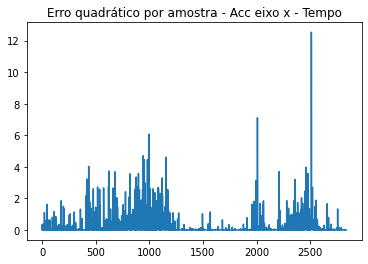

In [17]:
plt.plot(acc['x'])
plt.title('Erro quadrático por amostra - Acc eixo x - Tempo')

Text(0.5, 1.0, 'Erro quadrático por amostra - Acc eixo y - Tempo')

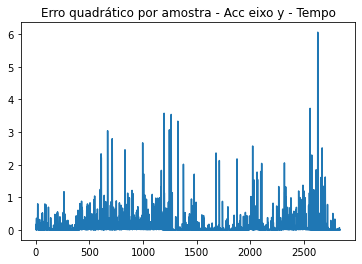

In [18]:
plt.plot(acc['y'])
plt.title('Erro quadrático por amostra - Acc eixo y - Tempo')

Text(0.5, 1.0, 'Erro quadrático por amostra - Acc eixo z - Tempo')

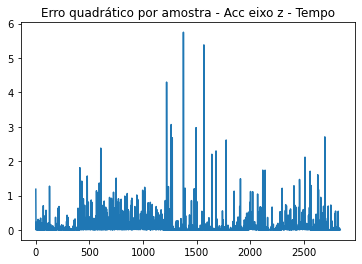

In [19]:
plt.plot(acc['z'])
plt.title('Erro quadrático por amostra - Acc eixo z - Tempo')

## Frequency

In [20]:
data_1 = data_filtered_fft.X
data_2 = data_no_gravity_fft.X

acc = {'x': [], 'y': [], 'z': []}
axis = ['x', 'y', 'z']

data_1 = data_filtered_fft.X
data_1 = np.reshape(data_1, (data_filtered.data.shape[0], 6, 30))

data_2 = data_no_gravity_fft.X
data_2 = np.reshape(data_2, (data_filtered.data.shape[0], 6, 30))

erro_list = []

for sample_1, sample_2 in zip(data_1, data_2):
    for i in range(3):
        erro = mean_squared_error(sample_1[i], sample_2[i])
        axi = axis[i]
        acc[axi].append(erro)

Text(0.5, 1.0, 'Erro quadrático por amostra - Acc eixo x - Frequência')

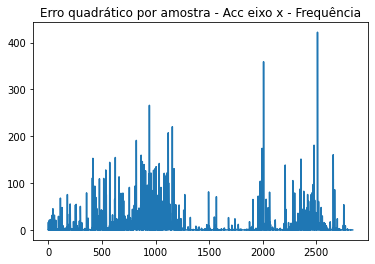

In [21]:
plt.plot(acc['x'])
plt.title('Erro quadrático por amostra - Acc eixo x - Frequência')

Text(0.5, 1.0, 'Erro quadrático por amostra - Acc eixo y - Frequência')

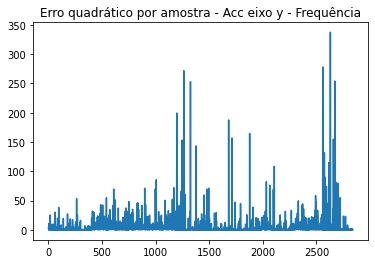

In [22]:
plt.plot(acc['y'])
plt.title('Erro quadrático por amostra - Acc eixo y - Frequência')

Text(0.5, 1.0, 'Erro quadrático por amostra - Acc eixo z - Frequência')

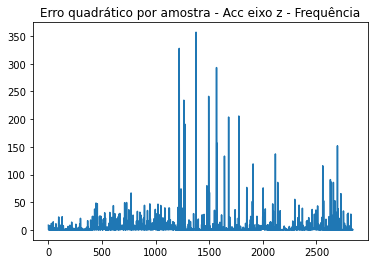

In [23]:
plt.plot(acc['z'])
plt.title('Erro quadrático por amostra - Acc eixo z - Frequência')

# Plot UMAP and T-SNE

In [24]:
def plot_data(df, figsize: tuple = (8, 8), title: str = None, labels: dict = None):
    fig, ax = plt.subplots(figsize=figsize)
    for label, group_df in df.groupby("label"):
        label = labels[label] if labels is not None else label
        ax.scatter(group_df.x, group_df.y, label=label, s=1.5)
    ax.legend()
    plt.title(title)
    plt.show()

In [25]:
def plot_classes(df, figsize: tuple = (8, 8), title: str = None, labels: dict = None):
    fig, ax = plt.subplots(figsize=figsize)
    marker = {
        "sit": '.',
        "stand": '2',
        "walk": '1',
        "stair up": '+',
        "stair down": 'x',
        "run": '4',
        "stair up and down": '3'
    }
    for label, group_df in df.groupby("label"):
        label = labels[label] if labels is not None else label
        ax.scatter(group_df.x, group_df.y, label=label, marker=marker[label])
    ax.legend()
    plt.title(title)
    plt.show()

In [26]:
standard_activity_codes = {
    0: "sit",
    1: "stand",
    2: "walk",
    3: "stair up",
    4: "stair down",
    5: "run",
    6: "stair up and down"
}
print(standard_activity_codes)

{0: 'sit', 1: 'stand', 2: 'walk', 3: 'stair up', 4: 'stair down', 5: 'run', 6: 'stair up and down'}


In [27]:
dataset = {
    'UCI_1': 'UCI filtered', 
    'UCI_2': 'UCI without gravity'
}
print(dataset)

{'UCI_1': 'UCI filtered', 'UCI_2': 'UCI without gravity'}


In [28]:
X = data_time.data.iloc[:,:-4]
y = np.array(data_time.data['DataSet'])
X

,accel-x-0,accel-x-1,accel-x-2,accel-x-3,accel-x-4,accel-x-5,accel-x-6,accel-x-7,accel-x-8,accel-x-9,...,gyro-z-50,gyro-z-51,gyro-z-52,gyro-z-53,gyro-z-54,gyro-z-55,gyro-z-56,gyro-z-57,gyro-z-58,gyro-z-59
0,0.156566,-1.424124,-2.905373,-1.449460,-1.068465,-1.123434,-1.195326,-0.833242,1.702248,2.030561,...,0.080595,-0.112580,0.156026,0.313386,0.000744,-0.047502,-0.569485,-0.652966,0.050269,0.477185
1,-0.537229,-0.186480,1.051567,0.605424,-0.185871,3.032825,4.907514,4.161293,1.228430,-0.243705,...,0.307554,0.768617,0.822427,0.841789,0.214277,-0.155207,-0.054555,0.275682,0.461437,-0.171866
2,-2.151572,-2.340571,0.602388,2.951933,1.112684,3.037523,-0.053386,-1.381455,-0.637672,-2.754747,...,0.239563,0.095893,0.056733,-0.278544,-0.050879,0.363474,0.356592,0.452005,0.304909,-0.237935
3,-0.121271,-1.496275,-1.492793,-1.547828,-0.905671,-0.681165,-0.371455,0.291828,1.207175,1.622875,...,-0.232457,-0.074255,0.416932,0.290052,0.337902,0.202508,-0.316462,-0.537158,-0.476181,-0.320307
4,1.557988,1.860748,1.597169,2.202641,3.586844,1.869756,-1.940422,-3.407308,-3.873758,-2.844197,...,-0.143105,0.161871,0.269892,0.205870,-0.161104,-0.067245,-0.006595,-0.044617,-0.235705,0.503788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,0.017501,-0.005150,0.046590,0.015040,-0.015556,-0.020852,0.003582,0.046828,-0.006665,-0.004373,...,0.044122,0.090105,0.046593,0.031638,0.072647,0.042126,0.033508,0.076152,0.075603,0.088298
2836,0.125088,0.042467,0.006995,0.213147,0.052038,0.076885,0.079689,0.042719,-0.010606,-0.124042,...,0.068840,-0.146129,-0.018823,0.029851,-0.206289,-0.136850,-0.630499,-0.839667,-0.659217,-0.289991
2837,-0.031472,-0.002955,-0.021896,-0.048216,0.047393,0.025162,-0.027973,0.000735,0.015306,0.008458,...,0.066905,0.046511,0.066148,0.020672,-0.014555,-0.001317,0.033882,-0.014371,-0.040736,-0.028039
2838,0.035469,-0.020037,0.002042,0.028068,0.009334,0.006054,0.007255,-0.013172,0.014361,-0.000404,...,0.071280,0.127426,0.113088,-0.015436,-0.011416,0.066621,0.076468,0.064951,-0.245364,-0.591111


In [29]:
X_class = data_time_class.data.iloc[:,:-4]
y_class = np.array(data_time_class.data['standard activity code'])
X_class

,accel-x-0,accel-x-1,accel-x-2,accel-x-3,accel-x-4,accel-x-5,accel-x-6,accel-x-7,accel-x-8,accel-x-9,...,gyro-z-50,gyro-z-51,gyro-z-52,gyro-z-53,gyro-z-54,gyro-z-55,gyro-z-56,gyro-z-57,gyro-z-58,gyro-z-59
0,0.156566,-1.424124,-2.905373,-1.449460,-1.068465,-1.123434,-1.195326,-0.833242,1.702248,2.030561,...,0.080595,-0.112580,0.156026,0.313386,0.000744,-0.047502,-0.569485,-0.652966,0.050269,0.477185
1,-0.537229,-0.186480,1.051567,0.605424,-0.185871,3.032825,4.907514,4.161293,1.228430,-0.243705,...,0.307554,0.768617,0.822427,0.841789,0.214277,-0.155207,-0.054555,0.275682,0.461437,-0.171866
2,-2.151572,-2.340571,0.602388,2.951933,1.112684,3.037523,-0.053386,-1.381455,-0.637672,-2.754747,...,0.239563,0.095893,0.056733,-0.278544,-0.050879,0.363474,0.356592,0.452005,0.304909,-0.237935
3,-0.121271,-1.496275,-1.492793,-1.547828,-0.905671,-0.681165,-0.371455,0.291828,1.207175,1.622875,...,-0.232457,-0.074255,0.416932,0.290052,0.337902,0.202508,-0.316462,-0.537158,-0.476181,-0.320307
4,1.557988,1.860748,1.597169,2.202641,3.586844,1.869756,-1.940422,-3.407308,-3.873758,-2.844197,...,-0.143105,0.161871,0.269892,0.205870,-0.161104,-0.067245,-0.006595,-0.044617,-0.235705,0.503788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,0.017501,-0.005150,0.046590,0.015040,-0.015556,-0.020852,0.003582,0.046828,-0.006665,-0.004373,...,0.044122,0.090105,0.046593,0.031638,0.072647,0.042126,0.033508,0.076152,0.075603,0.088298
2836,0.125088,0.042467,0.006995,0.213147,0.052038,0.076885,0.079689,0.042719,-0.010606,-0.124042,...,0.068840,-0.146129,-0.018823,0.029851,-0.206289,-0.136850,-0.630499,-0.839667,-0.659217,-0.289991
2837,-0.031472,-0.002955,-0.021896,-0.048216,0.047393,0.025162,-0.027973,0.000735,0.015306,0.008458,...,0.066905,0.046511,0.066148,0.020672,-0.014555,-0.001317,0.033882,-0.014371,-0.040736,-0.028039
2838,0.035469,-0.020037,0.002042,0.028068,0.009334,0.006054,0.007255,-0.013172,0.014361,-0.000404,...,0.071280,0.127426,0.113088,-0.015436,-0.011416,0.066621,0.076468,0.064951,-0.245364,-0.591111


In [30]:
data_fft = transformer(data_time)
data_fft_class = transformer(data_time_class)

### UMAP

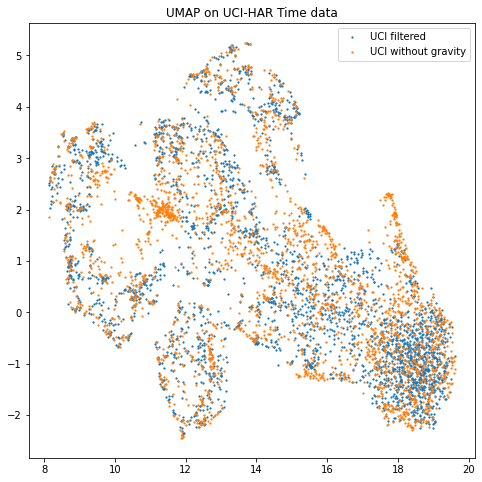

In [31]:
model = UMAP(n_components=2, random_state=0)
result = pd.DataFrame(model.fit_transform(X), columns=["x", "y"])
result["label"] = y
plot_data(result, title="UMAP on UCI-HAR Time data", labels=dataset)

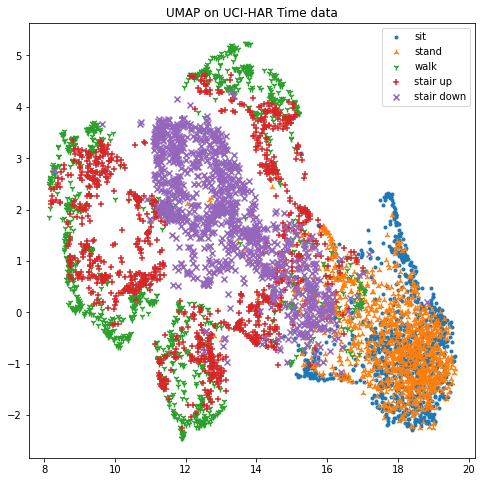

In [32]:
model = UMAP(n_components=2, random_state=0)
result = pd.DataFrame(model.fit_transform(X_class), columns=["x", "y"])
result["label"] = y_class
plot_classes(result, title="UMAP on UCI-HAR Time data", labels=standard_activity_codes)

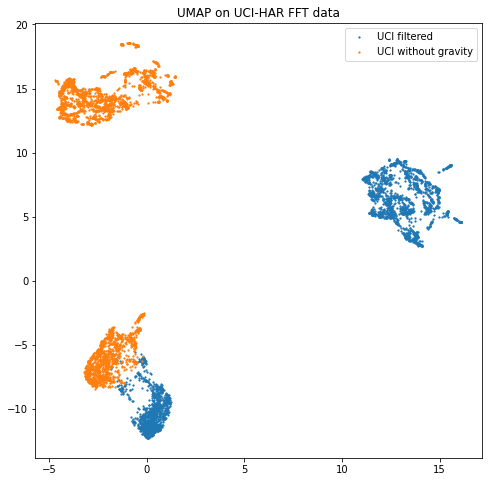

In [33]:
model = UMAP(n_components=2, random_state=0)
result = pd.DataFrame(model.fit_transform(data_fft[:][0]), columns=["x", "y"])
result["label"] = data_fft[:][1]
plot_data(result, title="UMAP on UCI-HAR FFT data", labels=dataset)

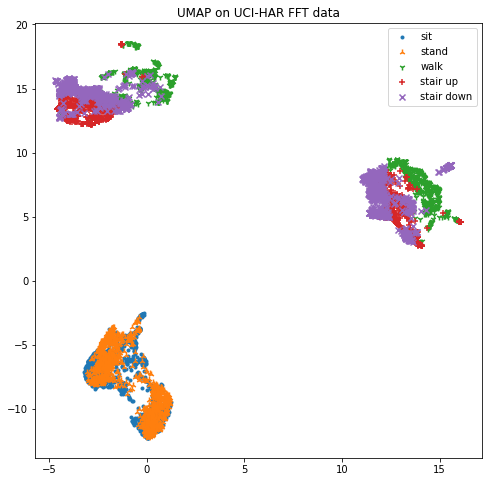

In [34]:
model = UMAP(n_components=2, random_state=0)
result = pd.DataFrame(model.fit_transform(data_fft_class[:][0]), columns=["x", "y"])
result["label"] = data_fft_class[:][1]
plot_classes(result, title="UMAP on UCI-HAR FFT data", labels=standard_activity_codes)

### T-SNE

/home/ic-unicamp/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ic-unicamp/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


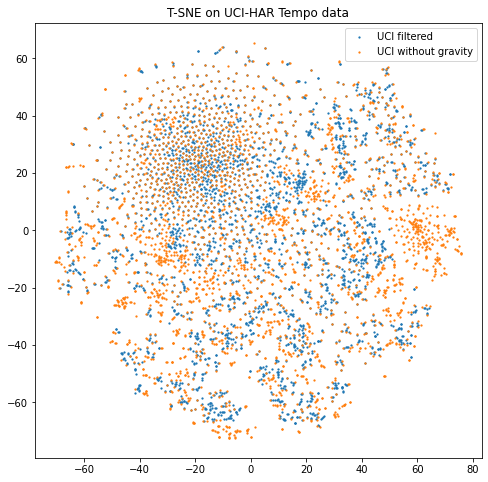

In [35]:
model = TSNE(n_components=2, random_state=0)
result = pd.DataFrame(model.fit_transform(X), columns=["x", "y"])
result["label"] = y
plot_data(result, title="T-SNE on UCI-HAR Tempo data", labels=dataset)

/home/ic-unicamp/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ic-unicamp/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


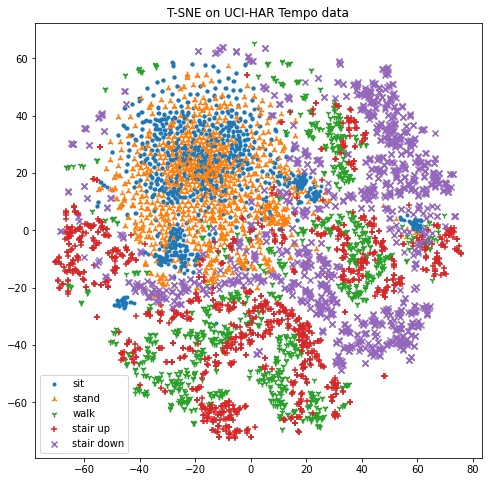

In [36]:
model = TSNE(n_components=2, random_state=0)
result = pd.DataFrame(model.fit_transform(X_class), columns=["x", "y"])
result["label"] = y_class
plot_classes(result, title="T-SNE on UCI-HAR Tempo data", labels=standard_activity_codes)

/home/ic-unicamp/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ic-unicamp/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


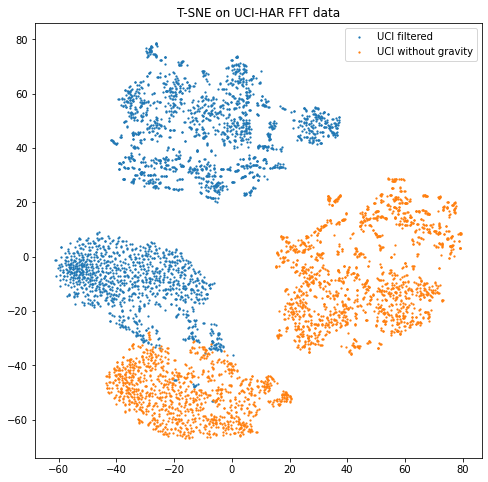

In [37]:
model = TSNE(n_components=2, random_state=0)
result = pd.DataFrame(model.fit_transform(data_fft[:][0]), columns=["x", "y"])
result["label"] = data_fft[:][1]
plot_data(result, title="T-SNE on UCI-HAR FFT data", labels=dataset)

/home/ic-unicamp/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ic-unicamp/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


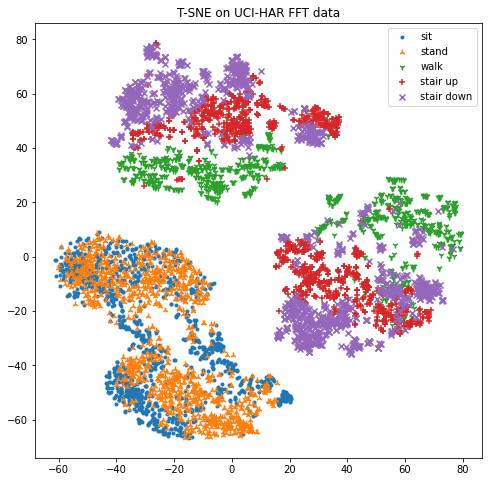

In [38]:
model = TSNE(n_components=2, random_state=0)
result = pd.DataFrame(model.fit_transform(data_fft_class[:][0]), columns=["x", "y"])
result["label"] = data_fft_class[:][1]
plot_classes(result, title="T-SNE on UCI-HAR FFT data", labels=standard_activity_codes)